In [17]:
def trapezoidal_membership(x, point1, point2, slope1, slope2, max_value):
 
    
    delta1 = x - point1
    delta2 = point2 - x
    

    if delta1 <= 0 or delta2 <= 0:
        return 0
    

    membership_degree = min(delta1 * slope1, delta2 * slope2, max_value)
    
    return membership_degree


x = 3 
point1 = 1  
point2 = 5 
slope1 = 1 / (2 - 1) 
slope2 = 1 / (5 - 3)  
max_value = 1 

degree_of_membership = trapezoidal_membership(x, point1, point2, slope1, slope2, max_value)
print(f"Degree of membership: {degree_of_membership}")


Degree of membership: 1.0


Throttle Control: 158.9999999999999


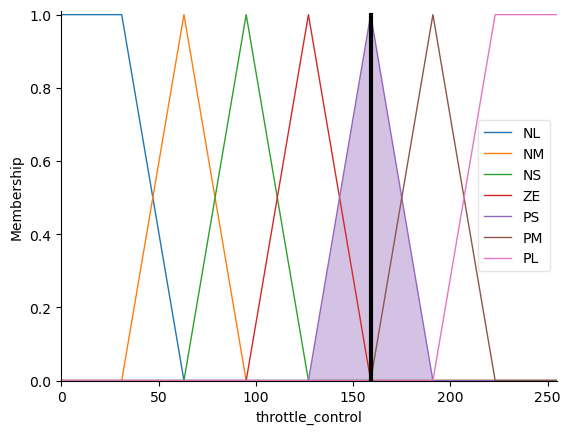

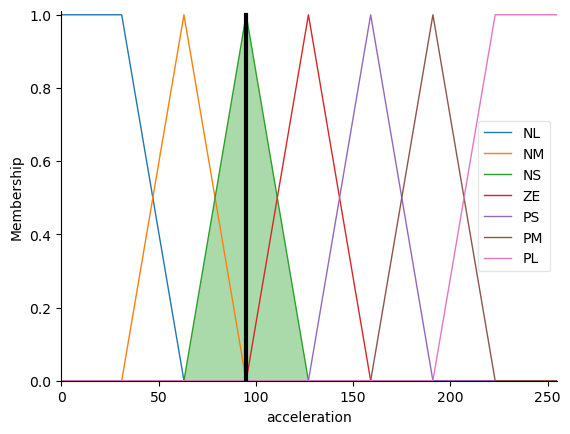

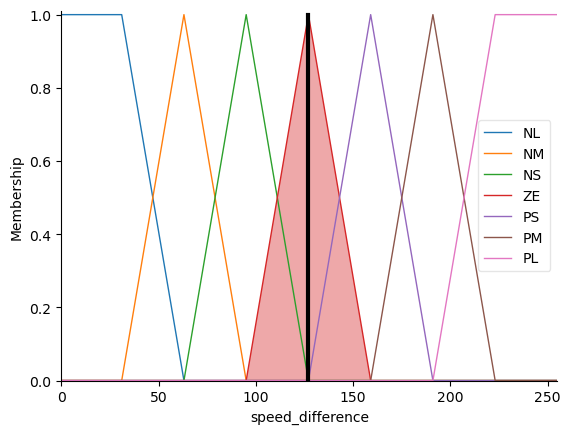

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



speed_difference = ctrl.Antecedent(np.arange(0, 256, 1), 'speed_difference')
acceleration = ctrl.Antecedent(np.arange(0, 256, 1), 'acceleration')


throttle_control = ctrl.Consequent(np.arange(0, 256, 1), 'throttle_control')


speed_difference['NL'] = fuzz.trapmf(speed_difference.universe, [0, 0, 31, 63])
speed_difference['NM'] = fuzz.trimf(speed_difference.universe, [31, 63, 95])
speed_difference['NS'] = fuzz.trimf(speed_difference.universe, [63, 95, 127])
speed_difference['ZE'] = fuzz.trimf(speed_difference.universe, [95, 127, 159])
speed_difference['PS'] = fuzz.trimf(speed_difference.universe, [127, 159, 191])
speed_difference['PM'] = fuzz.trimf(speed_difference.universe, [159, 191, 223])
speed_difference['PL'] = fuzz.trapmf(speed_difference.universe, [191, 223, 255, 255])


acceleration['NL'] = fuzz.trapmf(acceleration.universe, [0, 0, 31, 63])
acceleration['NM'] = fuzz.trimf(acceleration.universe, [31, 63, 95])
acceleration['NS'] = fuzz.trimf(acceleration.universe, [63, 95, 127])
acceleration['ZE'] = fuzz.trimf(acceleration.universe, [95, 127, 159])
acceleration['PS'] = fuzz.trimf(acceleration.universe, [127, 159, 191])
acceleration['PM'] = fuzz.trimf(acceleration.universe, [159, 191, 223])
acceleration['PL'] = fuzz.trapmf(acceleration.universe, [191, 223, 255, 255])


throttle_control['NL'] = fuzz.trapmf(throttle_control.universe, [0, 0, 31, 63])
throttle_control['NM'] = fuzz.trimf(throttle_control.universe, [31, 63, 95])
throttle_control['NS'] = fuzz.trimf(throttle_control.universe, [63, 95, 127])
throttle_control['ZE'] = fuzz.trimf(throttle_control.universe, [95, 127, 159])
throttle_control['PS'] = fuzz.trimf(throttle_control.universe, [127, 159, 191])
throttle_control['PM'] = fuzz.trimf(throttle_control.universe, [159, 191, 223])
throttle_control['PL'] = fuzz.trapmf(throttle_control.universe, [191, 223, 255, 255])


rule1 = ctrl.Rule(speed_difference['NL'] & acceleration['ZE'], throttle_control['PL'])
rule2 = ctrl.Rule(speed_difference['ZE'] & acceleration['NL'], throttle_control['PL'])
rule3 = ctrl.Rule(speed_difference['NM'] & acceleration['ZE'], throttle_control['PM'])
rule4 = ctrl.Rule(speed_difference['NS'] & acceleration['PS'], throttle_control['PS'])
rule5 = ctrl.Rule(speed_difference['PS'] & acceleration['NS'], throttle_control['NS'])
rule6 = ctrl.Rule(speed_difference['PL'] & acceleration['ZE'], throttle_control['NL'])
rule7 = ctrl.Rule(speed_difference['ZE'] & acceleration['NS'], throttle_control['PS'])
rule8 = ctrl.Rule(speed_difference['ZE'] & acceleration['NM'], throttle_control['PM'])


cruise_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
cruise_control_sim = ctrl.ControlSystemSimulation(cruise_control_system)


speed_diff_value = 127  
acceleration_value = 95  

cruise_control_sim.input['speed_difference'] = speed_diff_value
cruise_control_sim.input['acceleration'] = acceleration_value

cruise_control_sim.compute()

print(f"Throttle Control: {cruise_control_sim.output['throttle_control']}")

throttle_control.view(sim=cruise_control_sim)
acceleration.view(sim=cruise_control_sim)
speed_difference.view(sim=cruise_control_sim)


In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature_difference = ctrl.Antecedent(np.arange(-10, 11, 1), 'temperature_difference')
temp_rate_change = ctrl.Antecedent(np.arange(-5, 6, 1), 'temp_rate_change')  # Rate of change of temperature
dial = ctrl.Consequent(np.arange(-10, 11, 1), 'dial')

# Define membership functions for temperature difference (input)
temperature_difference['PL'] = fuzz.trimf(temperature_difference.universe, [5, 7.5, 10])  # Larger range for PL
temperature_difference['PS'] = fuzz.trimf(temperature_difference.universe, [0, 5, 7.5])   # Adjusted PS range
temperature_difference['ZE'] = fuzz.trimf(temperature_difference.universe, [-1, 0, 1])    # No change

# Define membership functions for rate of temperature change (input)
temp_rate_change['PL'] = fuzz.trimf(temp_rate_change.universe, [3, 4, 5])  # Adjust PL range
temp_rate_change['NS'] = fuzz.trimf(temp_rate_change.universe, [-5, -4, 0])  # Adjust NS range
temp_rate_change['ZE'] = fuzz.trimf(temp_rate_change.universe, [-1, 0, 1])  # Zero change

# Define membership functions for dial (output)
dial['NL'] = fuzz.trimf(dial.universe, [-10, -10, -5])  # Negative Large
dial['NM'] = fuzz.trimf(dial.universe, [-10, -5, 0])    # Negative Medium
dial['ZE'] = fuzz.trimf(dial.universe, [-1, 0, 1])      # Zero

# Define fuzzy rules based on the rule base provided

# Rule 1: If ΔT is ZE and dT/dt is PL then dial should be NL
rule1 = ctrl.Rule(temperature_difference['ZE'] & temp_rate_change['PL'], dial['NL'])

# Rule 2: If ΔT is PL and dT/dt is ZE then dial should be NM
rule2 = ctrl.Rule(temperature_difference['PL'] & temp_rate_change['ZE'], dial['NM'])

# Rule 3: If ΔT is PS and dT/dt is NS then dial should be ZE
rule3 = ctrl.Rule(temperature_difference['PS'] & temp_rate_change['NS'], dial['ZE'])

# Create the control system
ac_control = ctrl.ControlSystem([rule1, rule2, rule3])
ac_simulation = ctrl.ControlSystemSimulation(ac_control)

# Function to simulate the fuzzy system
def fuzzy_ac_control(temp_diff, rate_of_change):
    # Set input temperature difference and rate of temperature change
    ac_simulation.input['temperature_difference'] = temp_diff
    ac_simulation.input['temp_rate_change'] = rate_of_change
    
    # Compute the output
    ac_simulation.compute()
    
    # Print debug information
    print("Inputs:", ac_simulation.input)
    print("Output variables:", ac_simulation.output)

    # Return the dial adjustment
    return ac_simulation.output.get('dial', 'Dial output not available')

# Example: Simulate the system with a temperature difference of +3°C and rate of change +2°C/min
temp_diff = 3  # PS
rate_of_change = 2  # PL
dial_setting = fuzzy_ac_control(temp_diff, rate_of_change)
print(f'Temperature Difference: {temp_diff}°C, Rate of Change: {rate_of_change}°C/min, Dial Setting: {dial_setting}')


Inputs: temperature_difference : 3
temp_rate_change : 2

Output variables: {}
Temperature Difference: 3°C, Rate of Change: 2°C/min, Dial Setting: Dial output not available
